<a href="https://colab.research.google.com/github/sha4hzaib/assignment_no_5_6/blob/main/decitree_and_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Running models with 70% training and 30% testing:


GINI Model - Accuracy: 6.67%
Precision: 0.04
Recall: 0.06
F1 Score: 0.05


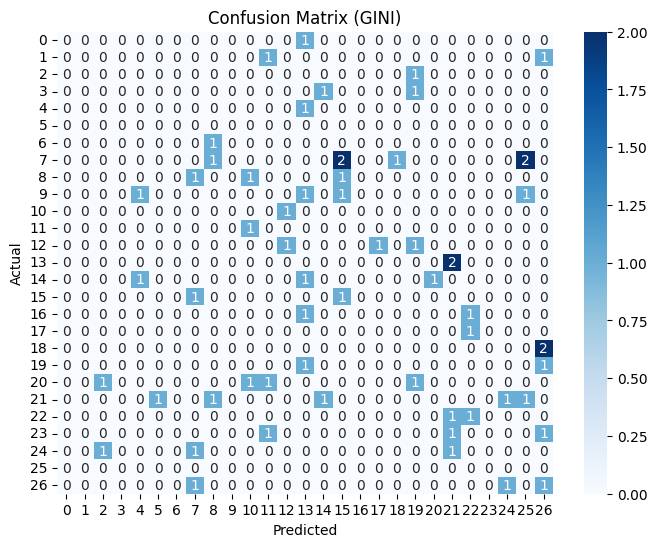

AUC is not applicable for GINI (multi-class classification).
ENTROPY Model - Accuracy: 0.00%
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


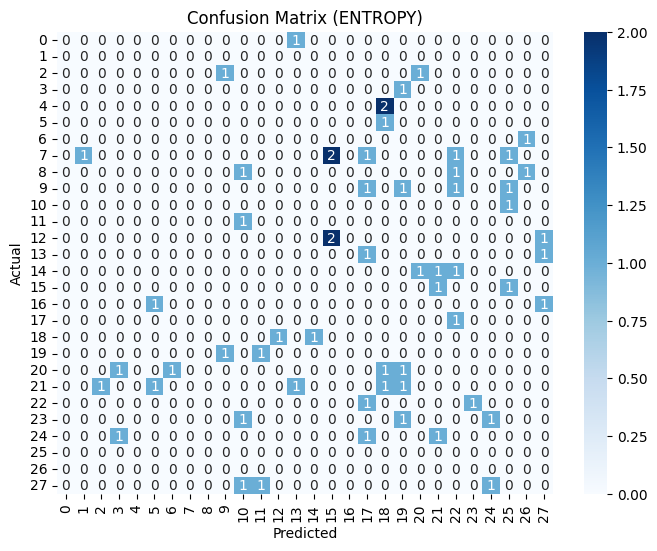

AUC is not applicable for ENTROPY (multi-class classification).

Running models with 80% training and 20% testing:
GINI Model - Accuracy: 7.50%
Precision: 0.03
Recall: 0.05
F1 Score: 0.03


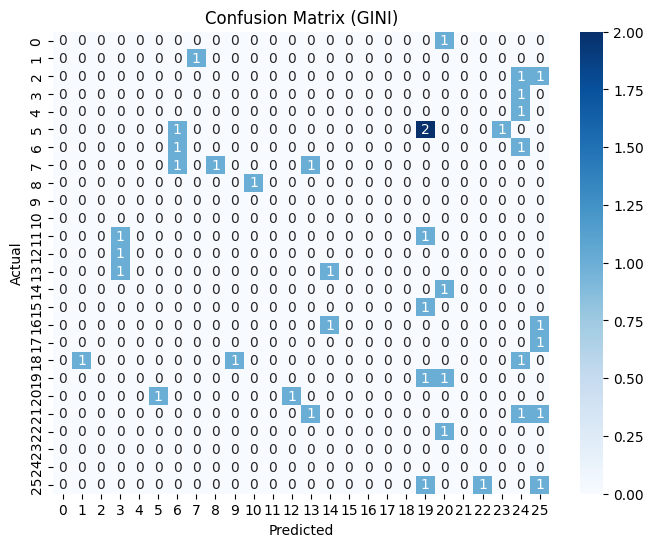

AUC is not applicable for GINI (multi-class classification).
ENTROPY Model - Accuracy: 7.50%
Precision: 0.04
Recall: 0.04
F1 Score: 0.04


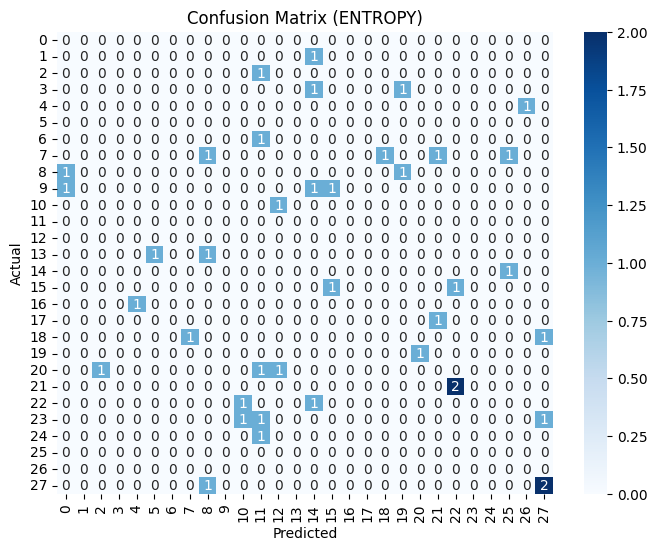

AUC is not applicable for ENTROPY (multi-class classification).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("cars data.csv")

features = ["First Name", "Last Name", "Car Brand", "Car Model", "Car Color", "Credit Card Type"]
X = data[features]
Y = data["Year of Manufacture"]

le = LabelEncoder()
for col in X.columns:
    X.loc[:, col] = le.fit_transform(X[col].values)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to run Decision Tree and ID3 models
def run_decision_tree(X_train, X_test, Y_train, Y_test, criterion):
    # Train the Decision Tree model
    tree_model = DecisionTreeClassifier(criterion=criterion, max_depth=20, random_state=1)
    tree_model.fit(X_train, Y_train)

    # Predict using the model
    Y_pred = tree_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='macro', zero_division=0)
    f1 = f1_score(Y_test, Y_pred, average='macro')

    # Print metrics
    print(f"{criterion.upper()} Model - Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({criterion.upper()})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate AUC if applicable (for binary classification)
    try:
        if len(set(Y)) == 2:
            auc = roc_auc_score(Y_test, tree_model.predict_proba(X_test)[:, 1])  # Binary AUC
            print(f"AUC ({criterion.upper()}): {auc:.2f}")
        else:
            print(f"AUC is not applicable for {criterion.upper()} (multi-class classification).")
    except ValueError:
        print(f"AUC is not applicable for {criterion.upper()}.")

# Run models with 70% training, 30% testing
print("\nRunning models with 70% training and 30% testing:")
print("\n")
X_train_70, X_test_30, Y_train_70, Y_test_30 = train_test_split(X_scaled, Y, test_size=0.3, random_state=1)

# Decision Tree (Gini)
run_decision_tree(X_train_70, X_test_30, Y_train_70, Y_test_30, criterion='gini')

# ID3 (Entropy)
run_decision_tree(X_train_70, X_test_30, Y_train_70, Y_test_30, criterion='entropy')

# Run models with 80% training, 20% testing
print("\nRunning models with 80% training and 20% testing:")

X_train_80, X_test_20, Y_train_80, Y_test_20 = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

# Decision Tree (Gini)
run_decision_tree(X_train_80, X_test_20, Y_train_80, Y_test_20, criterion='gini')

# ID3 (Entropy)
run_decision_tree(X_train_80, X_test_20, Y_train_80, Y_test_20, criterion='entropy')


Running models with 70% training and 30% testing:

Metrics for test_size=30.0%
Accuracy: 1.67%
Precision: 0.01
Recall: 0.02
F1 Score: 0.01


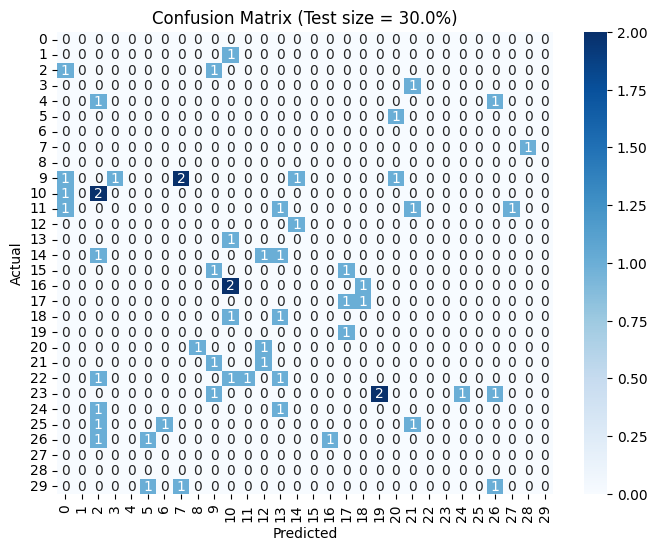

AUC is not applicable for multi-class classification without binarization.
Running models with 80% training and 20% testing:

Metrics for test_size=20.0%
Accuracy: 2.50%
Precision: 0.02
Recall: 0.02
F1 Score: 0.02


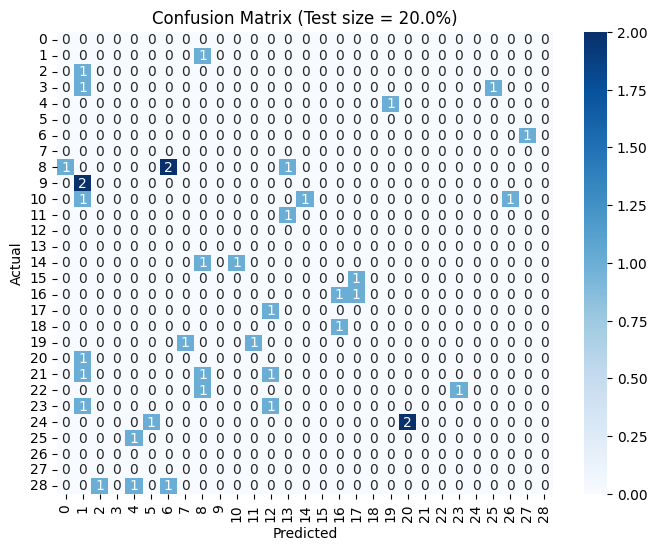

AUC is not applicable for multi-class classification without binarization.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (replace with appropriate dataset path)
data = pd.read_csv("cars data.csv")

# Define features and target variable
features = ["First Name", "Last Name", "Car Brand", "Car Model", "Car Color", "Credit Card Type"]
X = data[features]
Y = data["Year of Manufacture"]

# Label encode categorical features
le = LabelEncoder()
for col in X.columns:
    X.loc[:, col] = le.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to run models with different train-test splits and calculate metrics
def run_models(test_size):
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=test_size, random_state=1)

    # K-Means Clustering
    kmeans = KMeans(n_clusters=3, random_state=1)
    kmeans.fit(X_train)
    kmeans_labels = kmeans.predict(X_test)

    # KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='macro', zero_division=0)
    f1 = f1_score(Y_test, Y_pred, average='macro')

    # Print metrics
    print(f"\nMetrics for test_size={test_size * 100}%")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (Test size = {test_size * 100}%)")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate AUC if applicable (binary classification)
    try:
        if len(set(Y)) == 2:
            auc = roc_auc_score(Y_test, knn.predict_proba(X_test)[:, 1])
            print(f"AUC: {auc:.2f}")
        else:
            print("AUC is not applicable for multi-class classification without binarization.")
    except ValueError:
        print("AUC is not applicable.")

# Run models with 70% training, 30% testing
print("Running models with 70% training and 30% testing:")
run_models(test_size=0.3)

# Run models with 80% training, 20% testing
print("Running models with 80% training and 20% testing:")
run_models(test_size=0.2)